<a href="https://colab.research.google.com/github/melltl/data_science_courses/blob/main/regresssao%20linear/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

coeficientes para encontrar uma reta

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='svg'

In [4]:
X=np.array([0,1,2,3])
y=np.array([0,1,2,3])

Text(0, 2.9, 'Alpha=1 e Beta=0')

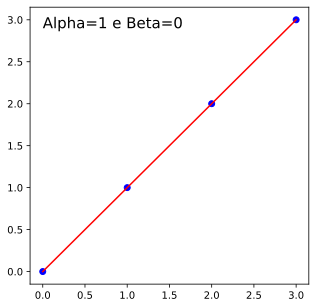

In [11]:
def predict(alpha,beta,X):
  return alpha*X+beta
alpha=1

beta=0

ý=predict(alpha=alpha,beta=beta,X=X)

fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(X,y,c='b')
plt.plot(X,ý,'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha,beta),fontdict={'size':15})

In [12]:
tamanho=len(X)

X_b=np.c_[np.ones((tamanho,1)),X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.]])

In [14]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([-2.77555756e-16,  1.00000000e+00])

Gradiente descendente

algoritmo de otimização capaz de encontrar solucoes para diferentes problemas
O Gradiente Descendente é um algoritmo de otimização que realiza o ajuste de parâmetros de forma iterativa com o objetivo de encontrar o valor θ₀ e θ₁ que minimiza a função de interesse. Ou seja, a reta que melhor se ajusta aos dados.

taxa de aprendizagem n pode ser mt pequena nem mt grande

gradiente descendente, calcula o erro das retas do dados em relacao a funcao de custo ate encontrar uma reta que minimize o erro

#metricas para avaliar regressao



In [1]:
from sklearn import metrics
import numpy as np

In [6]:
y_test=np.array([1,2,3,4])
ý=np.array([1,2,3,6])

- MAE
  - erro absoluto entre os valores preditos e valores reais
  - medida nao ideal para valores mais delicados(quando queremos punir o valor predito mais distande do valor real)

In [9]:
metrics.mean_absolute_error(y_test,ý)

0.5

- Mean square error(MSE)
 - calcula o erro das previsoes ao quadrado
 - pune valores mt distantes do real diferente do mae
 - pode ser mais confuso

In [7]:
metrics.mean_squared_error(y_test,ý)

1.0

- Root mean square error(rmse)
 - calcula a raiz do erro media quadratico
 - interpretabilidade melhorada em relacao ao MSE

In [8]:
np.sqrt(metrics.mean_squared_error(y_test,ý))

1.0

- Mean absolute percentage error(MAPE)
 - calcula erro abcoluto em porcentagem
 -  facil de interpretar
 - ruim quando o problema possui um grande alcance de numero onde a variavel predita varia de 0 a 20000

In [10]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/ y_true))*100

In [12]:
mean_absolute_percentage_error(y_test,ý)

12.5




- r-quadrado
 - expressa quao proximo as medidas reais estao do nosso modelo
 - so consegue calcular a variancia em relacao a uma unica variavel(X==1)


In [13]:
metrics.r2_score(y_test,ý)

0.19999999999999996

- r quadrado ajustado
   - representa a porcentagem da variancia sem vies devido ao acrescimo de novas features
   - pode ser utilizada com modelos de mais uma feature


In [15]:
def adjusted_R(y,ý,N):
  adj_r=(1 -((1 - metrics.r2_score(y,ý)) * (len(y)- 1))/ (len(y)-N -1))
  return adj_r
adjusted_R(y_test,ý,1)

-0.20000000000000018